# COVID EXPLORATION

## IMPORTS

In [12]:
# imports
import requests as rts
import pandas as pd
import hvplot.pandas
import datetime as dt

## FIRST DATASET

In [2]:
# covid tracking 1
# read csvs
covid_1_data = pd.read_csv('data/CRDT Data - CRDT.csv')

## SECOND DATASET

In [3]:
# covid tracking 2
#  api urls
covid_2_url = 'https://api.covidtracking.com/v1/us/daily.json'

# Execute `GET` request with api url
covid_2_response_data = rts.get(covid_2_url)

# Format data as JSON
data = covid_2_response_data.json()

# data
covid_2_data = pd.DataFrame(data)
# covid_2_data.head()

## THIRD DATASET

In [4]:
# covid tracking 3
#  api urls
covid_3_url = 'https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/bing_covid-19_data/latest/bing_covid-19_data.json'

# Execute `GET` request with url
covid_3_response_data = rts.get(covid_2_url)

# Format data as JSON
data = covid_3_response_data.json()

# data
covid_3_data = pd.DataFrame(data)
# covid_3_data.head()

## FOURTH DATASET

In [5]:
# fips
# read csvs
FIPS_data = pd.read_csv('data/us-state-ansi-fips.csv')
# FIPS_data

## PLOTS

In [6]:
# sort values
covid_2_data = covid_2_data.sort_values('date', ascending=True)

# reset index
covid_2_data = covid_2_data.reset_index()

# drop new index column
covid_2_data = covid_2_data[['date', 'dateChecked', 'death', 'deathIncrease',
       'hash', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'lastModified', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'pending', 'posNeg',
       'positive', 'positiveIncrease', 'recovered', 'states', 'total',
       'totalTestResults', 'totalTestResultsIncrease']]

# trimmed the tail end of data
covid_states = covid_2_data.iloc[0:354,:]

# plot covid deaths
covid_2_data.hvplot(title='Covid19 Death Increase 2020', rot=90,
                    y='deathIncrease',ylabel='Numbers of Deaths')

# for loop to find index of last date
# index = 0
# for i in covid_2_data['date']:
# #     print(i)
#     if i == 20201231:
#         print(index)
#     index += 1

:Curve   [index]   (deathIncrease)

In [7]:
covid_1_data_less = covid_1_data[['Deaths_White',
       'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial',
       'Deaths_Ethnicity_Hispanic']]

deaths_plot_2 = covid_1_data_less.sum()

deaths_plot_2 = deaths_plot_2.hvplot.bar(rot=90,xlabel='Races',ylabel='Num of Deaths', yformatter='%.0f',width=800,height=400,title='Total Covid-19 Deaths By Race From January 2020 to March 2021',)

deaths_plot_2

:Bars   [index]   (0)

In [8]:
##### covid_1_data
deaths_plot_3 = covid_1_data[['State','Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial','Deaths_Ethnicity_Hispanic']]

deaths_plot_3 = deaths_plot_3.groupby(by='State').sum()
#  Plot
ylist = ['Deaths_White',
       'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial','Deaths_Ethnicity_Hispanic']


deaths_plot_3 = deaths_plot_3.hvplot.bar(x='Deaths_Total', 
                        y=ylist, 
                        groupby='State', 
                        xlabel='Races', 
                        ylabel='Num of Deaths',
                        title='Total Covid-19 Deaths By Race (State) From January 2020 to March 2021',
                        yformatter='%.0f',
                        rot=90,
                        height=500
                       )

deaths_plot_3

:DynamicMap   [State]
   :Bars   [Deaths_Total,Variable]   (value)

# CURRENCY PAIR EXPLORATION

## IMPORTS

In [19]:
# imports
import seaborn as sns
import holoviews as hv
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension("plotly")
import warnings
warnings.filterwarnings("ignore")

## FIFTH DATASET

In [20]:
# read AUDUSD csvs
AUDUSD = pd.read_csv('data/AUDUSD1440.csv', index_col="date")
# read EURUSD csvs
EURUSD = pd.read_csv('data/EURUSD1440.csv', index_col="date")
# read GBPUSD csvs
GBPUSD = pd.read_csv('data/GBPUSD1440.csv', index_col="date")
# read NZDUSD csvs
NZDUSD = pd.read_csv('data/NZDUSD1440.csv', index_col="date")
# read USDCAD csvs
USDCAD = pd.read_csv('data/USDCAD1440.csv', index_col="date")
# read USDCHF csvs
USDCHF = pd.read_csv('data/USDCHF1440.csv', index_col="date")
# read USDJPY csvs
USDJPY = pd.read_csv('data/USDJPY1440.csv', index_col="date")

## COMBINED CLOSE PRICES

In [21]:
AUDUSD_close = pd.DataFrame(AUDUSD['close'])
AUDUSD_close.columns = ['AUDUSD']

EURUSD_close = pd.DataFrame(EURUSD['close'])
EURUSD_close.columns = ['EURUSD']

GBPUSD_close = pd.DataFrame(GBPUSD['close'])
GBPUSD_close.columns = ['GBPUSD']

NZDUSD_close = pd.DataFrame(NZDUSD['close'])
NZDUSD_close.columns = ['NZDUSD']

USDCAD_close = pd.DataFrame(USDCAD['close'])
USDCAD_close.columns = ['USDCAD']

USDCHF_close = pd.DataFrame(USDCHF['close'])
USDCHF_close.columns = ['USDCHF']

USDJPY_close = pd.DataFrame(USDJPY['close'])
USDJPY_close.columns = ['USDJPY']

In [22]:
major7 = pd.concat([AUDUSD_close,EURUSD_close,GBPUSD_close,NZDUSD_close,USDCAD_close,USDCHF_close,USDJPY_close], axis=1).dropna()
major7.head()

,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDJPY
2020.01.02,0.69822,1.11712,1.31371,0.66982,1.29844,0.97144,108.546
2020.01.03,0.69444,1.11558,1.30743,0.66645,1.30033,0.97239,108.108
2020.01.05,0.69364,1.11592,1.30688,0.66540,1.29893,0.97156,107.970
2020.01.06,0.69383,1.11952,1.31747,0.66681,1.29640,0.96855,108.415
2020.01.07,0.68674,1.11473,1.31154,0.66307,1.30011,0.96875,107.994


In [23]:
 # Use the `pct_change` function to calculate daily returns for each stock
daily_returns = major7.pct_change().dropna()
daily_returns.head()

,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDJPY
2020.01.03,-0.005414,-0.001379,-0.004780,-0.005031,0.001456,0.000978,-0.004035
2020.01.05,-0.001152,0.000305,-0.000421,-0.001576,-0.001077,-0.000854,-0.001277
2020.01.06,0.000274,0.003226,0.008103,0.002119,-0.001948,-0.003098,0.004122
2020.01.07,-0.010219,-0.004279,-0.004501,-0.005609,0.002862,0.000206,-0.003883
2020.01.08,-0.000379,-0.003391,-0.001289,0.003469,0.002700,0.004697,0.009658


In [24]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation 

,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDJPY
AUDUSD,1.000000,0.608092,0.715049,0.908251,-0.704619,-0.489152,-0.293643
EURUSD,0.608092,1.000000,0.611214,0.579981,-0.415923,-0.862317,-0.514583
GBPUSD,0.715049,0.611214,1.000000,0.700089,-0.545201,-0.562668,-0.449300
NZDUSD,0.908251,0.579981,0.700089,1.000000,-0.682772,-0.448411,-0.272945
USDCAD,-0.704619,-0.415923,-0.545201,-0.682772,1.000000,0.287589,0.019655
USDCHF,-0.489152,-0.862317,-0.562668,-0.448411,0.287589,1.000000,0.599243
USDJPY,-0.293643,-0.514583,-0.449300,-0.272945,0.019655,0.599243,1.000000


<AxesSubplot:>

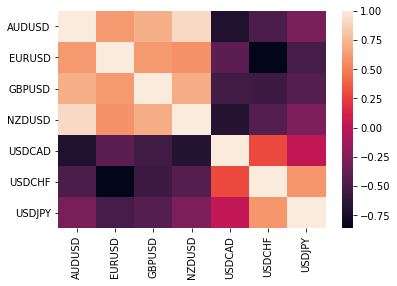

In [25]:
 # Create a heatmap from the correlation values
sns.heatmap(correlation)

In [37]:
# reset index
major7_date_col = major7.reset_index()

In [39]:
# plot AUDUSD
AUDUSD_plot = major7_date_col.hvplot(title='AUDUSD 2020', y='AUDUSD')
AUDUSD_plot

:Curve   [index]   (AUDUSD)

In [40]:
# plot EURUSD
EURUSD_plot = major7_date_col.hvplot(title='EURUSD 2020', y='EURUSD')
EURUSD_plot

:Curve   [index]   (EURUSD)

In [41]:
# plot GBPUSD
GBPUSD_plot = major7_date_col.hvplot(title='GBPUSD 2020', y='GBPUSD')
GBPUSD_plot

:Curve   [index]   (GBPUSD)

In [42]:
# plot NZDUSD
NZDUSD_plot = major7_date_col.hvplot(title='NZDUSD 2020', y='NZDUSD')
NZDUSD_plot

:Curve   [index]   (NZDUSD)

In [43]:
# plot USDCAD
USDCAD_plot = major7_date_col.hvplot(title='USDCAD 2020', y='USDCAD')
USDCAD_plot

:Curve   [index]   (USDCAD)

In [44]:
# plot USDCHF
USDCHF_plot = major7_date_col.hvplot(title='USDCHF 2020', y='USDCHF')
USDCHF_plot

:Curve   [index]   (USDCHF)

In [45]:
# plot USDJPY
USDJPY_plot = major7_date_col.hvplot(title='USDJPY 2020', y='USDJPY')
USDJPY_plot

:Curve   [index]   (USDJPY)